In [1]:
import pandas as pd
import numpy as np

In [3]:
#loading the dataset
df=pd.read_csv(r"C:\Users\User\Downloads\heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [9]:
#checking for missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
1.Compute the mean, median, and standard deviation for BMI, PhysicalHealth, MentalHealth, and SleepTime.

In [11]:
#Computing mean, median and standard deviation
stats = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].agg(['mean', 'median', 'std'])
stats


,BMI,PhysicalHealth,MentalHealth,SleepTime
mean,28.325399,3.37171,3.898366,7.097075
median,27.340000,0.00000,0.000000,7.000000
std,6.356100,7.95085,7.955235,1.436007


In [ ]:
2.Determine the proportion of individuals with heart disease in the dataset.

In [5]:
df.HeartDisease.value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [7]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [ ]:
3. Analyze the distribution of age categories in the dataset using appropriate visualization.

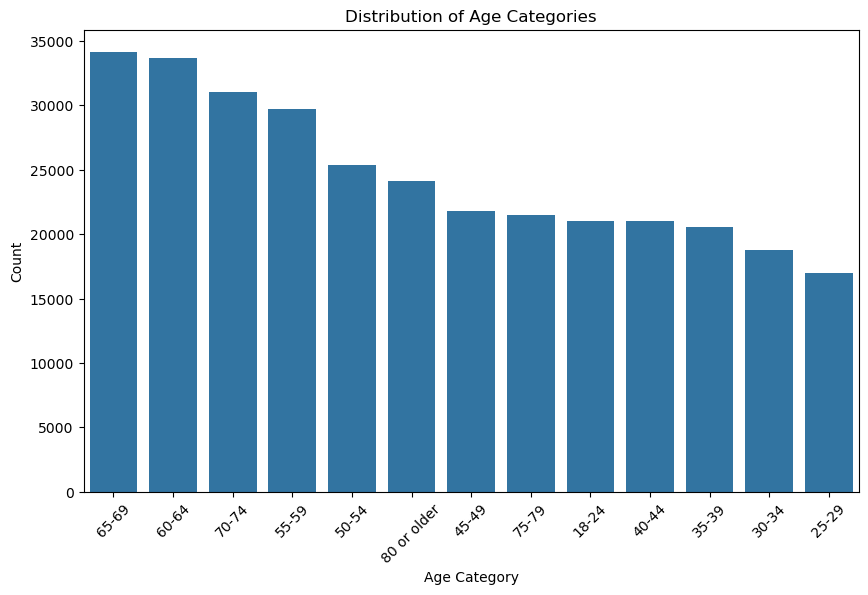

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of age categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeCategory', order=df['AgeCategory'].value_counts().index)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
4.Compare the average BMI between individuals with and without heart disease. Use visualization to support your findings.

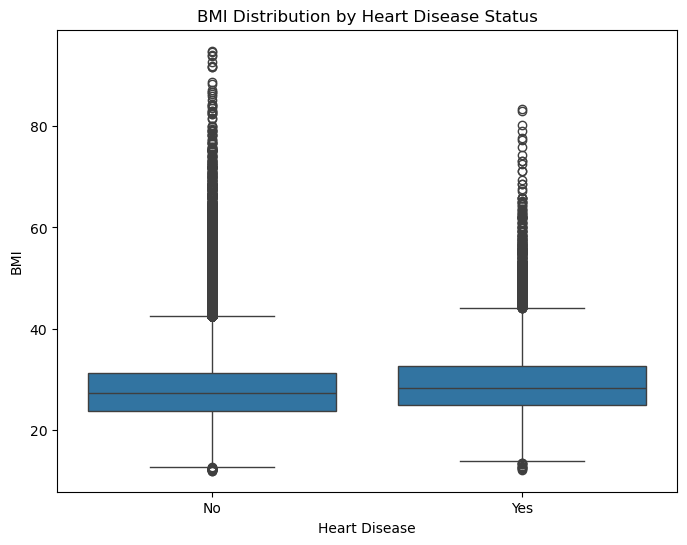

In [13]:
# Compare average BMI between individuals with and without heart disease
avg_bmi_by_heart_disease = df.groupby('HeartDisease')['BMI'].mean()

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='HeartDisease', y='BMI')
plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

In [ ]:
5. Investigate the relationship between physical activity and general health. Present your analysis using an appropriate visualization.

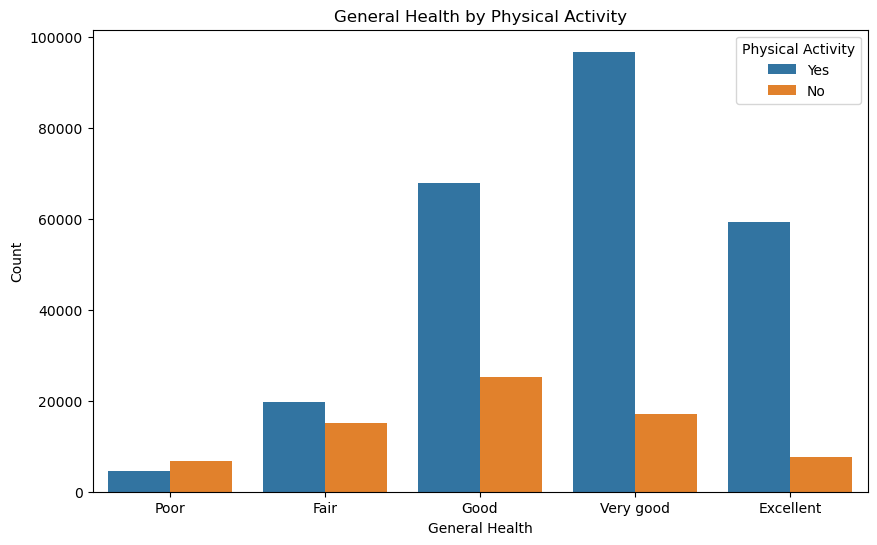

In [18]:
# Investigate the relationship between physical activity and general health
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GenHealth', hue='PhysicalActivity', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.title('General Health by Physical Activity')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.legend(title='Physical Activity')
plt.show()

In [ ]:
6.Does smoking have a significant association with heart disease? Use a statistical test to validate your claim.

In [15]:
import scipy as scipy
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['Smoking'],df['HeartDisease'])

In [17]:
chi2,p,dof,expected = chi2_contingency(contingency_table)
chi2

3713.0331469808216

In [19]:
p

0.0

In [21]:
dof

1

In [23]:
expected

array([[171804.72588377,  16082.27411623],
       [120617.27411623,  11290.72588377]])

In [ ]:
ANALYSIS MADE ABOVE
The p value is 0.0 therefore we reject the null hypothesis meaning smoking have a significant association with heart disease

In [ ]:
7. Explore the correlation between sleep time and mental health. What insights can you draw?

In [15]:
df.SleepTime.corr(df.MentalHealth)

-0.11971678803142115

Correlation between Sleep Time and Mental Health: -0.12


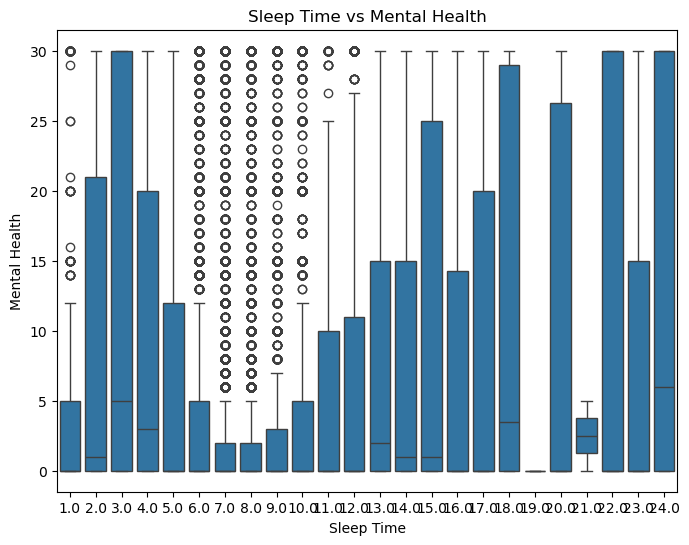

In [24]:
# Calculate the correlation between sleep time and mental health
correlation = df['SleepTime'].corr(df['MentalHealth'])

print(f"Correlation between Sleep Time and Mental Health: {correlation:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SleepTime', y='MentalHealth')
plt.title('Sleep Time vs Mental Health')
plt.xlabel('Sleep Time')
plt.ylabel('Mental Health')
plt.show()

In [ ]:
INSIGHTS
the correlation between sleep time and mental health is -0.12 this is a negative correlation meaning as sleep time increases the mental health decreases

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [32]:
X = df[['BMI', 'PhysicalActivity', 'Smoking', 'Diabetic']]
X = pd.get_dummies(X, drop_first=True)
y = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)


In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     87649
           1       0.00      0.00      0.00      8290

    accuracy                           0.91     95939
   macro avg       0.46      0.50      0.48     95939
weighted avg       0.83      0.91      0.87     95939

[[87649     0]
 [ 8290     0]]


In [ ]:
9. If you were to predict heart disease based on this dataset, which features would you include in your model, and why?

In [ ]:
BMI: Higher BMI is often associated with a higher risk of heart disease.

PhysicalActivity: Regular physical activity is known to reduce the risk of heart disease.

Smoking: Smoking is a significant risk factor for heart disease.

Diabetic: Diabetes is a major risk factor for cardiovascular diseases.

AgeCategory: Older age is associated with a higher risk of heart disease.

GenHealth: General health status can be a good indicator of heart disease risk.

SleepTime: Poor sleep can contribute to heart disease.

In [ ]:
10. Based on the findings from the dataset, what recommendations can you give to reduce the risk of heart disease?

In [ ]:
Avoid Smoking: Smoking is a major risk factor for heart disease; quitting can significantly reduce risk.

Manage Diabetes: Proper management of diabetes can help reduce the risk of heart disease.

Ensure Adequate Sleep: Aim for 7-9 hours of sleep per night to support overall health.

Monitor General Health: Regular check-ups and maintaining good general health can help in early detection and prevention of heart disease.